## Hypothesis Testing

#### For each of the following questions, 
#### - formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 

#### Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### 1. Has the network latency gone up since we switched internet service providers?


#### 1. - Null Hypothesis

There is no difference in network latency since changing internet providers.

#### 1. - Alternative Hypothesis

There is a difference in network latency since changing internet providers.

#### 1. - True Positive

There IS a difference in network latency and we conclude there is a difference in network latency. 

#### 1. - True Negative

There is NO difference in network latency and we conclude there is no difference in network latency 

#### 1. - Type I Error

We reject (accepting as false) the hypothesis that there was no difference in latency, when in fact, there was no difference in latency, and the hypothesis was true. 


#### 1. - Type II Error

We failed to reject (accepting as true) the hypothesis that there was no difference in latency, when in fact, there was a difference in latency, and the hypothesis was false. 

### 2. Is the website redesign any good?


#### 2. - Null Hypothesis

There is no difference in the number of website visits per day since the redesign date. 

#### 2 - Alternative Hypothesis

There is a difference in the number of website visits per day since the redesign date. 

#### 2. - True Positive

There IS a difference in website visits per day since the redesign date, and we conclude there is a difference in website visits per day since the redesign date. 

#### 2. - True Negative

There is NO difference in webstie visits per day since the redesign date and we conclude there is no differencce in website visits per day since the redesign date. 

#### 2. - Type I Error

We reject (accepting as false) the hypothesis that there is no difference in website visists per day since the redesign date, when in fact there is no difference in website visits per day since the redesign date, and the hyposthesis is in fact true. 

#### 2. - Type II Error

We fail to reject (accepting as true) that there is no difference in website visits per day since the redesign date, when in fact there IS a difference in website visists per day since the redesign date, and the hypothesis is in fact false.

### 3. Is our television ad driving more sales?

#### 3. - Null Hypothesis

There is no difference in total sales following the television ad.

#### 3. - Alternative Hypothesis
There is a difference in total sales following the television ad. 

#### 3. - True Positive

There IS a difference in total sales following the television ad, and we conclude there is a difference in total sales following the television ad. 

#### 3. - True Negative
There is NO difference in total sales following the television ad, and we conclude there is NO difference in total sales following the television ad.

#### 3. - Type I Error

We reject (accepting as false) the hypothesis that there is no difference in sales following the television ad, when in fact there is no difference total sales following the television ad, and the hyposthesis is in fact true. 

#### 3. - Type II Error

We fail to reject (accepting as true) that there is no difference in sales following the television ad, when in fact there IS a difference in sales following the television ad, and the hypothesis is in fact false.

# T-TEST 

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

#### - A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

#### - A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

In [22]:
# I beleive office 1 sells homes more quickly than office 2. 
# Is the average number of days it takes to sell a home higher for office 2?

#### - a. Distributions

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

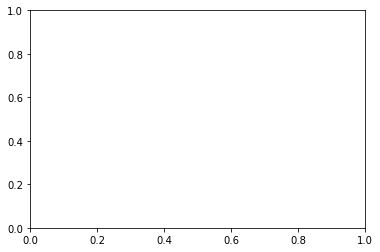

In [28]:

x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pmf


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')


plt.ylabel('%')
plt.xlabel('Number of Days')
plt.title('M4 Equations')
plt.legend()

plt.show()

#### - b. Set Hypothesis

#### - c. Set Alpha

In [ ]:
α = 0.05

#### - d. Assumptions

#### - e. Compute Test Statistics

#### - f.   (Depends on Test - Update based on type of test)

#### -Load the mpg dataset and use it to answer the following questions:

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
np.random.seed(123)

In [14]:
from pydataset import data
mpg = data('mpg') 

In [12]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

#### - a. Distributions

#### - b. Set Hypothesis

#### - c. Set Alpha

In [ ]:
α = 0.05

#### - d. Assumptions

#### - e. Compute Test Statistics

#### - f.   (Depends on Test - Update based on type of test)

### 2. Are compact cars more fuel-efficient than the average car?

#### - a. Distributions

#### - b. Set Hypothesis

#### - c. Set Alpha

In [ ]:
α = 0.05

#### - d. Assumptions

#### - e. Compute Test Statistics

#### - f.   (Depends on Test - Update based on type of test)

### 3. Do manual cars get better gas mileage than automatic cars?

#### - a. Distributions

#### - b. Set Hypothesis

#### - c. Set Alpha

In [ ]:
α = 0.05

#### - d. Assumptions

#### - e. Compute Test Statistics

#### - f.   (Depends on Test - Update based on type of test)